<a href="https://colab.research.google.com/github/jeongminia/NLP_paper_study/blob/main/1101_KETI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Import Library

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict, Counter
from wordcloud import WordCloud


import warnings
warnings.filterwarnings(action='ignore')

In [4]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='matplotlib')

In [3]:
!apt-get install fonts-nanum*
!apt-get install fontconfig
!apt-get -qq install fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
The following NEW packages will be installed:
  fonts-nanum fonts-nanum-coding fonts-nanum-eco fonts-nanum-extra
0 upgraded, 4 newly installed, 0 to remove and 49 not upgraded.
Need to get 46.0 MB of archives.
After this operation, 177 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-coding all 2.5-3 [4,988 B]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-eco all 1.000-7 [14.7 MB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-extra all 20200506-1 [21.0

In [4]:
!pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 40.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 31.4 MB/s eta 0:00:00


In [5]:
from konlpy.tag import Okt
okt = Okt()

In [6]:
#!pip install pyarrow==11.0.0
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.6 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


# 1. DATA
### casename_classification

id: a data id.

casetype: a case type. The value is either civil (민사) or criminal (형사).

casename: a case name.

facts: facts (사실관계) extracted from reasoning (이유) section of individual cases.

In [7]:
from datasets import load_dataset
data_cn = load_dataset("lbox/lbox_open", "casename_classification", download_mode="force_redownload")
data_cn

README.md:   0%|          | 0.00/1.43k [00:00<?, ?B/s]

lbox_open.py:   0%|          | 0.00/10.8k [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/5.66M [00:00<?, ?B/s]

(…)e_classification/validation/0000.parquet:   0%|          | 0.00/739k [00:00<?, ?B/s]

(…)asename_classification/test/0000.parquet:   0%|          | 0.00/743k [00:00<?, ?B/s]

(…)sename_classification/test2/0000.parquet:   0%|          | 0.00/890k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/8000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1000 [00:00<?, ? examples/s]

Generating test2 split:   0%|          | 0/1294 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['id', 'casetype', 'casename', 'facts'],
        num_rows: 8000
    })
    validation: Dataset({
        features: ['id', 'casetype', 'casename', 'facts'],
        num_rows: 1000
    })
    test: Dataset({
        features: ['id', 'casetype', 'casename', 'facts'],
        num_rows: 1000
    })
    test2: Dataset({
        features: ['id', 'casetype', 'casename', 'facts'],
        num_rows: 1294
    })
})

In [8]:
# train + validation 추출
train_data = data_cn['train']
val_data = data_cn['validation']

train = pd.DataFrame(train_data)
valid = pd.DataFrame(val_data)

train = train[['casetype', 'casename', 'facts']]
valid = valid[['casetype', 'casename', 'facts']]

In [9]:
train

,casetype,casename,facts
0,criminal,감염병의예방및관리에관한법률위반,피고인은 고양시 일산서구 B건물 C동에서 ‘D'을 실질적으로 운영하는 자이다.\n보...
1,criminal,감염병의예방및관리에관한법률위반,피고인은 성남시 중원구 B에서 ‘C'이라는 상호의 당구장을 운영하는 사람이다.\n중...
2,criminal,감염병의예방및관리에관한법률위반,"질병관리청장, 시·도지사 또는 시장·군수·구청장은 감염병을 예방하기 위하여나 감염병..."
3,criminal,감염병의예방및관리에관한법률위반,"질병관리청장, 시ㆍ도지사 또는 시장ㆍ군수ㆍ구청장은 감염병이 유행하면 감염병의 전파를..."
4,criminal,감염병의예방및관리에관한법률위반,"보건복지부장관, 시·도지사 또는 시장·군수·구청장은 감염병의 전파 방지 및 예방을 ..."
...,...,...,...
7995,criminal,횡령,범죄전력\n피고인은 2019. 12. 19. 서울중앙지방법원에서 도로교통법위반(음주...
7996,criminal,횡령,"기초사실\n피고인 B은 2018. 7.경 피고인 A에게 ‘신용도 문제가 있으니, 외..."
7997,criminal,횡령,범죄전력\n피고인 A은 2018. 4. 20. 대구지방법원 안동지원에서 사기죄 등으...
7998,criminal,횡령,피고인은 건설현장에서 목수로 일하는 사람으로 2012.경 지인의 소개로 피해자 B을...


In [10]:
valid

,casetype,casename,facts
0,criminal,감염병의예방및관리에관한법률위반,"질병관리청장, 시·도지사 또는 시장·군수·구청장은 제1급 감염병이 발생한 경우 감염..."
1,criminal,감염병의예방및관리에관한법률위반,"피고인은 안산시 단원구 B건물, C호에서 ‘D'라는 상호로 단란주점을 운영하는 사람..."
2,criminal,감염병의예방및관리에관한법률위반,피고인은 2021. 6. 6. 22:00경 코로나19 양성으로 확진되었다는 판정을 ...
3,criminal,감염병의예방및관리에관한법률위반,"질병관리청장, 시․도지사 또는 시장․군수․구청장은 감염병의 전파 방지를 위하여 또는..."
4,criminal,감염병의예방및관리에관한법률위반,"피고인은 서울 은평구 B, 지하1층에서 ‘C' 및 ‘D'라는 상호로 유흥주점을 운영..."
...,...,...,...
995,criminal,횡령,"피고인은 2014년경부터 서울 송파구 B건물, C호에서 ‘㈜D'라는 상호로 여행사를..."
996,criminal,횡령,범죄전력\n피고인은 2019. 8. 22. 인천지방법원에서 출입국관리법위반죄로 징역...
997,criminal,횡령,피고인은 부천시 B에서 C이라는 상호로 플라스틱 제조업을 영위하는 사람이다.\n피고...
998,criminal,횡령,"피고인은 B의 대표인 사람으로, 2019. 12.경 피해자 C(남, 61세)와 함께..."


In [11]:
print(train.casetype.unique(), train.casename.unique(), len(valid.casename.unique()))

print(valid.casetype.unique(), valid.casename.unique(), len(valid.casename.unique()))

print(len(train.casename.unique() == valid.casename.unique()))

['criminal' 'civil'] ['감염병의예방및관리에관한법률위반' '강제추행' '건물명도(인도)' '건물인도' '게임산업진흥에관한법률위반' '공무집행방해'
 '공무집행방해, 상해' '공무집행방해, 업무방해' '공사대금' '공연음란' '공유물분할' '공직선거법위반'
 '교통사고처리특례법위반(치사)' '교통사고처리특례법위반(치상)' '교통사고처리특례법위반(치상), 도로교통법위반(음주운전)'
 '구상금' '근로기준법위반' '근로기준법위반, 근로자퇴직급여보장법위반' '근저당권말소' '기타(금전)' '대여금'
 '도로교통법위반(무면허운전)' '도로교통법위반(무면허운전), 도로교통법위반(음주운전)'
 '도로교통법위반(무면허운전), 도로교통법위반(음주운전), 자동차손해배상보장법위반'
 '도로교통법위반(무면허운전), 도로교통법위반(음주측정거부)'
 '도로교통법위반(사고후미조치), 도로교통법위반(음주운전), 특정범죄가중처벌등에관한법률위반(도주치상)'
 '도로교통법위반(사고후미조치), 특정범죄가중처벌등에관한법률위반(도주치상)' '도로교통법위반(음주운전)'
 '도로교통법위반(음주운전), 특정범죄가중처벌등에관한법률위반(위험운전치상)' '도로교통법위반(음주측정거부)'
 '마약류관리에관한법률위반(대마)' '마약류관리에관한법률위반(대마), 마약류관리에관한법률위반(향정)'
 '마약류관리에관한법률위반(향정)' '매매대금' '매매대금반환' '명예훼손' '모욕' '무고' '물품대금' '배당이의'
 '배상명령신청, 사기' '배상명령신청, 사기, 사문서위조, 위조사문서행사' '배상명령신청, 사기방조' '병역법위반' '보증금반환'
 '보험금' '보험사기방지특별법위반' '부당이득금' '사기' '사기, 사문서위조, 위조사문서행사' '사기방조'
 '사문서위조, 위조사문서행사' '사해행위취소' '산업안전보건법위반, 업무상과실치사' '상해' '상해, 폭행'
 '성매매알선등행위의처벌에관한법률위반(성매매알선등)' '성폭력범죄의처벌등에관한특례법위반(카메라등이용촬영)'
 '성폭력범죄의처벌등에관한특례법위반(카

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   casetype  8000 non-null   object
 1   casename  8000 non-null   object
 2   facts     8000 non-null   object
dtypes: object(3)
memory usage: 187.6+ KB


In [13]:
valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   casetype  1000 non-null   object
 1   casename  1000 non-null   object
 2   facts     1000 non-null   object
dtypes: object(3)
memory usage: 23.6+ KB


In [14]:
train.describe()

,casetype,casename,facts
count,8000,8000,8000
unique,2,100,7997
top,criminal,횡령,범죄전력\n피고인은 2018. 8. 10. 창원지방법원에서 도로교통법위반(음주운전)...
freq,5440,80,2


In [15]:
valid.describe()

,casetype,casename,facts
count,1000,1000,1000
unique,2,100,1000
top,criminal,횡령,범죄전력\n피고인은 2021. 5. 12. 전주지방법원에서 절도죄로 징역 8월을 선...
freq,680,10,1


In [16]:
'''train.to_csv('train.csv', index=False)
valid.to_csv('valid.csv', index=False)'''

# 2. EDA

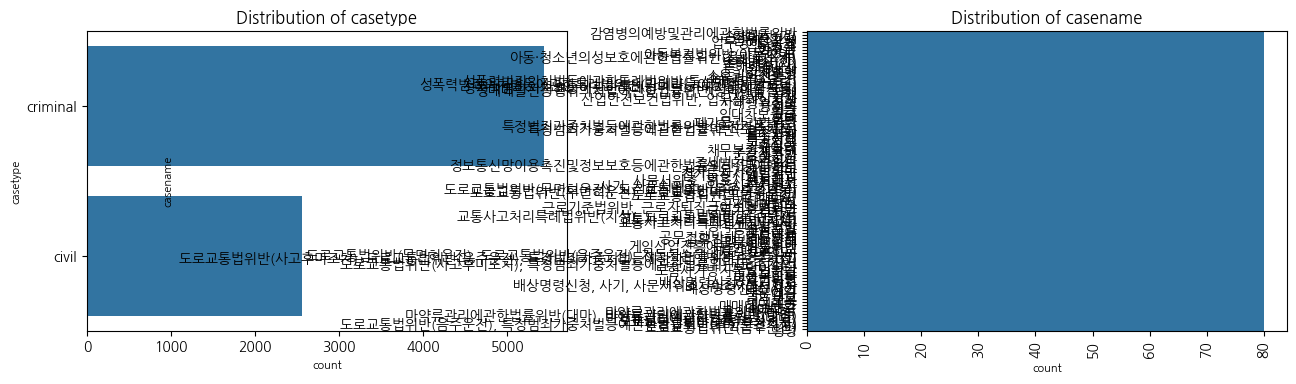

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
plt.subplots_adjust(left=0.1, bottom=0.2, right=0.9, top=0.8, wspace=0.5)

g = sns.countplot(y="casetype", data=train, order=train['casetype'].value_counts().index, ax=axes[0])
axes[0].set_xlabel(g.get_xlabel(), fontsize=8)
axes[0].set_ylabel(g.get_ylabel(), fontsize=8)
axes[0].set_title('Distribution of casetype')

g = sns.countplot(y="casename", data=train, order=train['casename'].value_counts().index, ax=axes[1])
axes[1].set_xlabel(g.get_xlabel(), fontsize=8)
axes[1].set_ylabel(g.get_ylabel(), fontsize=8)
axes[1].set_title('Distribution of casename')

plt.xticks(rotation=90)  # x축 글자 90도 회전
plt.subplots_adjust(wspace=0.5)  # 서브플롯 간 간격 조정
plt.show()

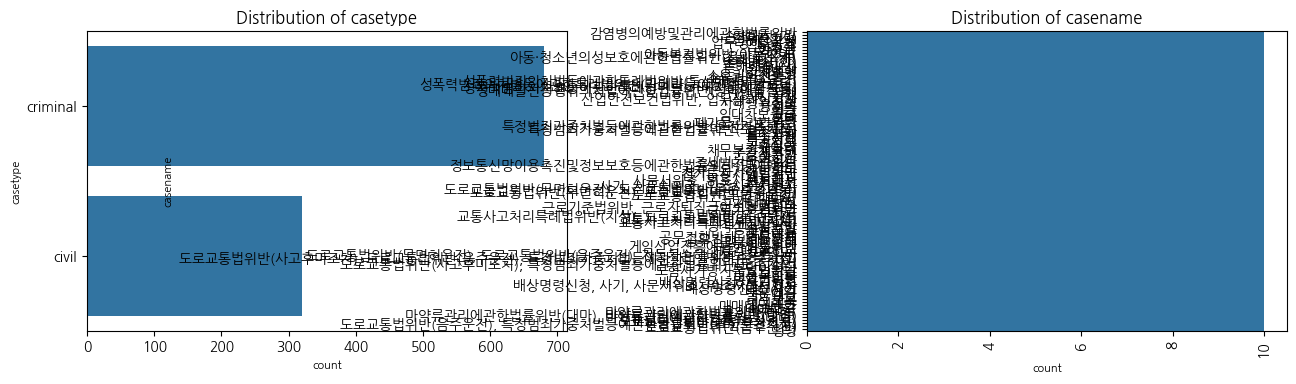

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
plt.subplots_adjust(left=0.1, bottom=0.2, right=0.9, top=0.8, wspace=0.5)

g = sns.countplot(y="casetype", data=valid, order=valid['casetype'].value_counts().index, ax=axes[0])
axes[0].set_xlabel(g.get_xlabel(), fontsize=8)
axes[0].set_ylabel(g.get_ylabel(), fontsize=8)
axes[0].set_title('Distribution of casetype')

g = sns.countplot(y="casename", data=valid, order=valid['casename'].value_counts().index, ax=axes[1])
axes[1].set_xlabel(g.get_xlabel(), fontsize=8)
axes[1].set_ylabel(g.get_ylabel(), fontsize=8)
axes[1].set_title('Distribution of casename')

plt.xticks(rotation=90)  # x축 글자 90도 회전
plt.subplots_adjust(wspace=0.5)  # 서브플롯 간 간격 조정
plt.show()

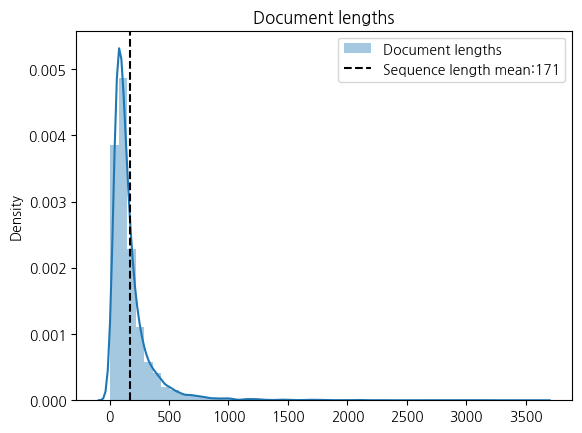

 가장 긴 문장은 3605 개의 단어
 가장 짧은 문장은 4 개의 단어


In [ ]:
def plot_doc_lengths(dataframe):
    mean_seq_len = np.round(dataframe.doc_len.mean()).astype(int)
    sns.distplot(tuple(dataframe.doc_len), hist=True, kde=True, label='Document lengths')
    plt.axvline(x=mean_seq_len, color='k', linestyle='--', label=f'Sequence length mean:{mean_seq_len}')
    plt.title('Document lengths')
    plt.legend()
    plt.show()
    print(f" 가장 긴 문장은 {train['doc_len'].max()} 개의 단어\n 가장 짧은 문장은 {train['doc_len'].min()} 개의 단어")

train['doc_len'] = train.facts.apply(lambda words: len(words.split()))
plot_doc_lengths(train)

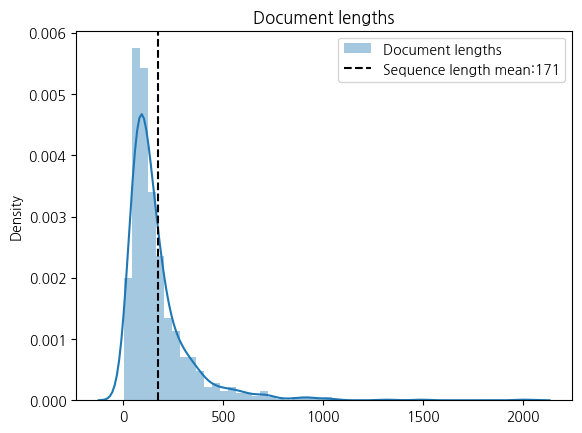

 가장 긴 문장은 3605 개의 단어
 가장 짧은 문장은 4 개의 단어


In [ ]:
valid['doc_len'] = valid.facts.apply(lambda words: len(words.split()))
plot_doc_lengths(valid)

In [ ]:
import re
def clean_text(sent):
  sent_clean = re.sub("[^가-힣ㄱ-ㅎㅏ-ㅣ\s]", " ", sent)
  return sent_clean

In [ ]:
train['cleaned_facts'] = train['facts'].apply(lambda x : clean_text(x))
train_text = train['cleaned_facts'].tolist()

token_sentences = [okt.nouns(text) for text in train_text]
counter = Counter()
for title in token_sentences:
  counter.update(title)

(-0.5, 399.5, 199.5, -0.5)

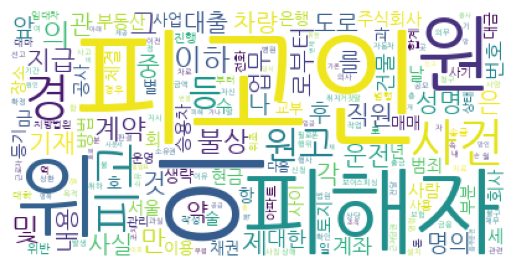

In [ ]:
FONT_PATH = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
wc = WordCloud(font_path = FONT_PATH,
                 background_color = "white")
cloud = wc.generate_from_frequencies(counter)
plt.imshow(cloud)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

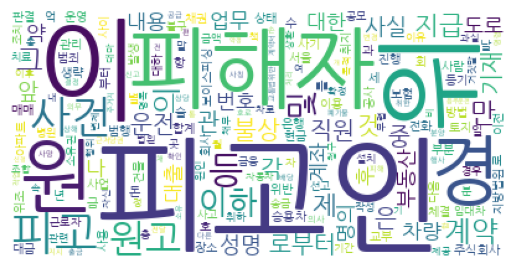

In [ ]:
valid['cleaned_facts'] = valid['facts'].apply(lambda x : clean_text(x))
valid_text = valid['cleaned_facts'].tolist()

token_sentences = [okt.nouns(text) for text in valid_text]
counter = Counter()
for title in token_sentences:
  counter.update(title)

cloud = wc.generate_from_frequencies(counter)
plt.imshow(cloud)
plt.axis('off')

# 3-1. TF-IDF

- Counte-based Representation 벡터화 : 단어가 문서(혹은 문장)에 등장하는 횟수를 기반으로 벡터화 하는 방법

각 데이터셋의 comments와 sentence 컬럼을 TF-IDF로 벡터화한 후 코사인 유사도를 계산하여 유사성을 평가

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# TF-IDF 벡터화
vectorizer = TfidfVectorizer()
train_tfidf = vectorizer.fit_transform(train['facts'])
valid_tfidf = vectorizer.transform(valid['facts'])  # 같은 벡터 공간으로 변환

데이터를 시각화하여 두 데이터셋의 차이와 유사성을 좀 더 직관적으로 파악

=> 메모리사용이 너무 커서 랜덤하게 진행

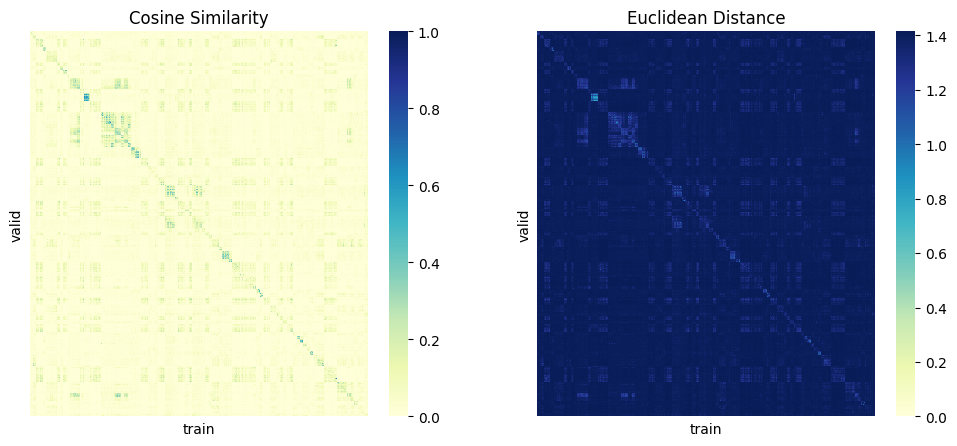

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity

similarity_block = cosine_similarity(train_tfidf, valid_tfidf)
euc_distances = euclidean_distances(train_tfidf, valid_tfidf)

# 시각화
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(similarity_block, cmap="YlGnBu", xticklabels=False, yticklabels=False)
plt.title("Cosine Similarity")
plt.xlabel("train")
plt.ylabel("valid")

plt.subplot(1, 2, 2)
sns.heatmap(euc_distances, cmap="YlGnBu", xticklabels=False, yticklabels=False)
plt.title("Euclidean Distance")
plt.xlabel("train")
plt.ylabel("valid")

plt.show()

# 3-2. Word2Vec

- Distributed Representation : 타겟 단어 주변에 있는 단어를 벡터화 하는 방법

In [ ]:
from gensim.models import Word2Vec
import numpy as np

# Word2Vec 모델 학습
sentences = [comment.split() for comment in train['facts']] + [sentence.split() for sentence in valid['facts']]
model = Word2Vec(sentences,
                 vector_size=100,
                 window=5,
                 min_count=1,
                 workers=4
                 )

In [ ]:
# 문장 벡터 평균 계산 함수
def sentence_vector(sentence, model):
    words = sentence.split()
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    return np.mean(word_vectors, axis=0) if word_vectors else np.zeros(model.vector_size)

# 각 데이터셋의 문장 벡터 생성
train_vectors = np.array([sentence_vector(comment, model) for comment in train['facts']])
valid_vectors = np.array([sentence_vector(sentence, model) for sentence in valid['facts']])

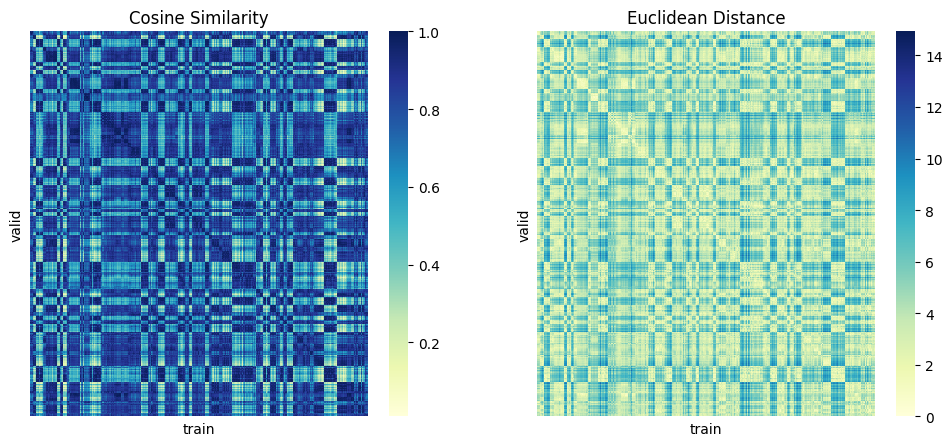

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity

similarity_block = cosine_similarity(train_vectors, valid_vectors)
euc_distances = euclidean_distances(train_vectors, valid_vectors)

# 시각화
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(similarity_block, cmap="YlGnBu", xticklabels=False, yticklabels=False)
plt.title("Cosine Similarity")
plt.xlabel("train")
plt.ylabel("valid")

plt.subplot(1, 2, 2)
sns.heatmap(euc_distances, cmap="YlGnBu", xticklabels=False, yticklabels=False)
plt.title("Euclidean Distance")
plt.xlabel("train")
plt.ylabel("valid")

plt.show()

Word2Vec은 같은 문맥에서 자주 등장하는 단어들에 대해 유사한 벡터를 생성하므로, 비교적 낮은 유사도에서도 유사한 단어들이 다수 존재

# 3-3 Sentence-BERT

https://github.com/snunlp/KR-SBERT

데이터가 너무 커서 일부만 선택

In [ ]:
from sentence_transformers import SentenceTransformer, util
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

# Korean-SBERT 모델 로드
model = SentenceTransformer('snunlp/KR-SBERT-V40K-klueNLI-augSTS')
model = model.to(device)

train_facts = train['facts'].tolist()
valid_facts = valid['facts'].tolist()

# 텍스트 임베딩 생성
train_embeddings = model.encode(train_facts, convert_to_tensor=True, batch_size=32, device=device)
valid_embeddings = model.encode(valid_facts, convert_to_tensor=True, batch_size=32, device=device)

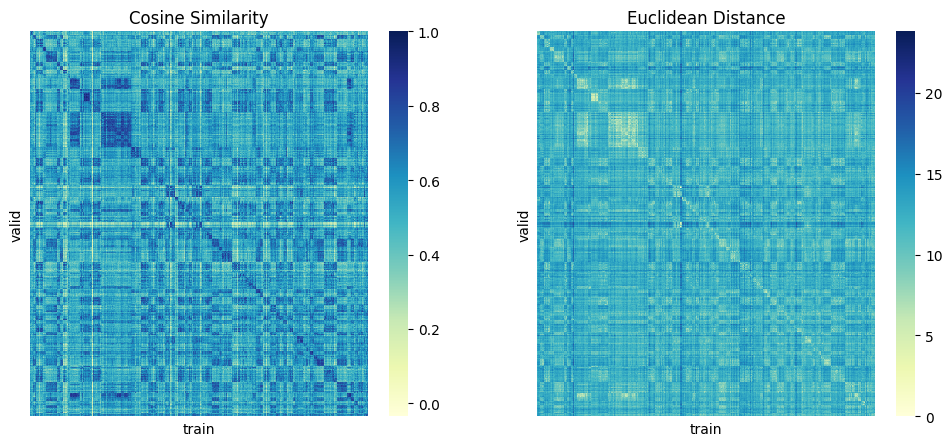

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity

train_embeddings = train_embeddings.cpu().numpy()
valid_embeddings = valid_embeddings.cpu().numpy()
similarity_block = cosine_similarity(train_embeddings, valid_embeddings)
euc_distances = euclidean_distances(train_embeddings, valid_embeddings)

# 시각화
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(similarity_block, cmap="YlGnBu", xticklabels=False, yticklabels=False)
plt.title("Cosine Similarity")
plt.xlabel("train")
plt.ylabel("valid")

plt.subplot(1, 2, 2)
sns.heatmap(euc_distances, cmap="YlGnBu", xticklabels=False, yticklabels=False)
plt.title("Euclidean Distance")
plt.xlabel("train")
plt.ylabel("valid")

plt.show()

# 3-4. 한국어전용토크나이저 적용한 SBERT

In [ ]:
# Korean-SBERT 모델 로드
model = SentenceTransformer('snunlp/KR-SBERT-V40K-klueNLI-augSTS')

In [ ]:
# Okt을 이용해 토큰화 후 Korean-SBERT 모델로 임베딩 생성
def embed_texts(texts):
    tokenized_texts = [" ".join(okt.morphs(text)) for text in texts]  # 형태소 단위로 토크나이징
    embeddings = model.encode(tokenized_texts, convert_to_tensor=True, batch_size=32, device=device)
    embeddings = embeddings.cpu().numpy()
    return embeddings

train_facts = embed_texts(train['facts'])
valid_facts = embed_texts(valid['facts'])

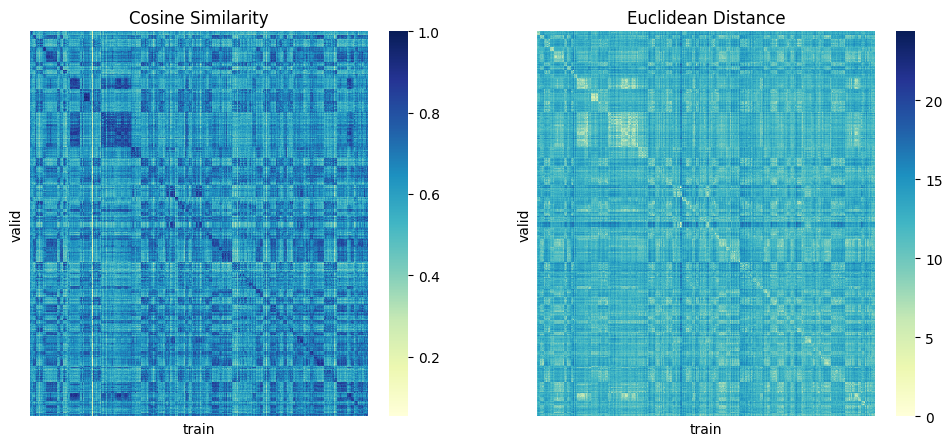

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
# 유사도 각각 계산
similarity_matrix = util.cos_sim(train_facts, valid_facts).cpu().numpy()
euc_distances = euclidean_distances(train_facts, valid_facts)

# 시각화
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(similarity_matrix, cmap="YlGnBu", xticklabels=False, yticklabels=False)
plt.title("Cosine Similarity")
plt.xlabel("train")
plt.ylabel("valid")

plt.subplot(1, 2, 2)
sns.heatmap(euc_distances, cmap="YlGnBu", xticklabels=False, yticklabels=False)
plt.title("Euclidean Distance")
plt.xlabel("train")
plt.ylabel("valid")

plt.show()

# 4. EvidentlyAI

In [ ]:
!pip install evidently

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 35.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.1/231.1 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 29.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.1/442.1 kB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.3/210.3 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 40.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 425.

In [ ]:
from evidently.report import Report
from evidently.metric_preset import DataDriftPreset, TargetDriftPreset
from evidently.metrics import ColumnDriftMetric

from evidently.test_suite import TestSuite
from evidently.tests import TestNumberOfDriftedColumns

evidently는 분석 방법에 따라 Report와 TestSuite로 나뉨
- Report는 분석 결과를 요약하고 시각화하는데 사용
- TestSuite는 정의된 조건에서 합격/불합격에 대한 결과를 반환

In [ ]:
report = Report(metrics=[
    DataDriftPreset(), # datadrift
    TargetDriftPreset()
])

report.run(reference_data=train, # 기준 데이터셋
           current_data=valid # 현재 데이터셋
           )
# 각 열의 유형과 관측 수, 고유 값의 수를 고려해 적합한 drift test를 자동 선택
report.show(mode='inline')

Buffered data was truncated after reaching the output size limit.

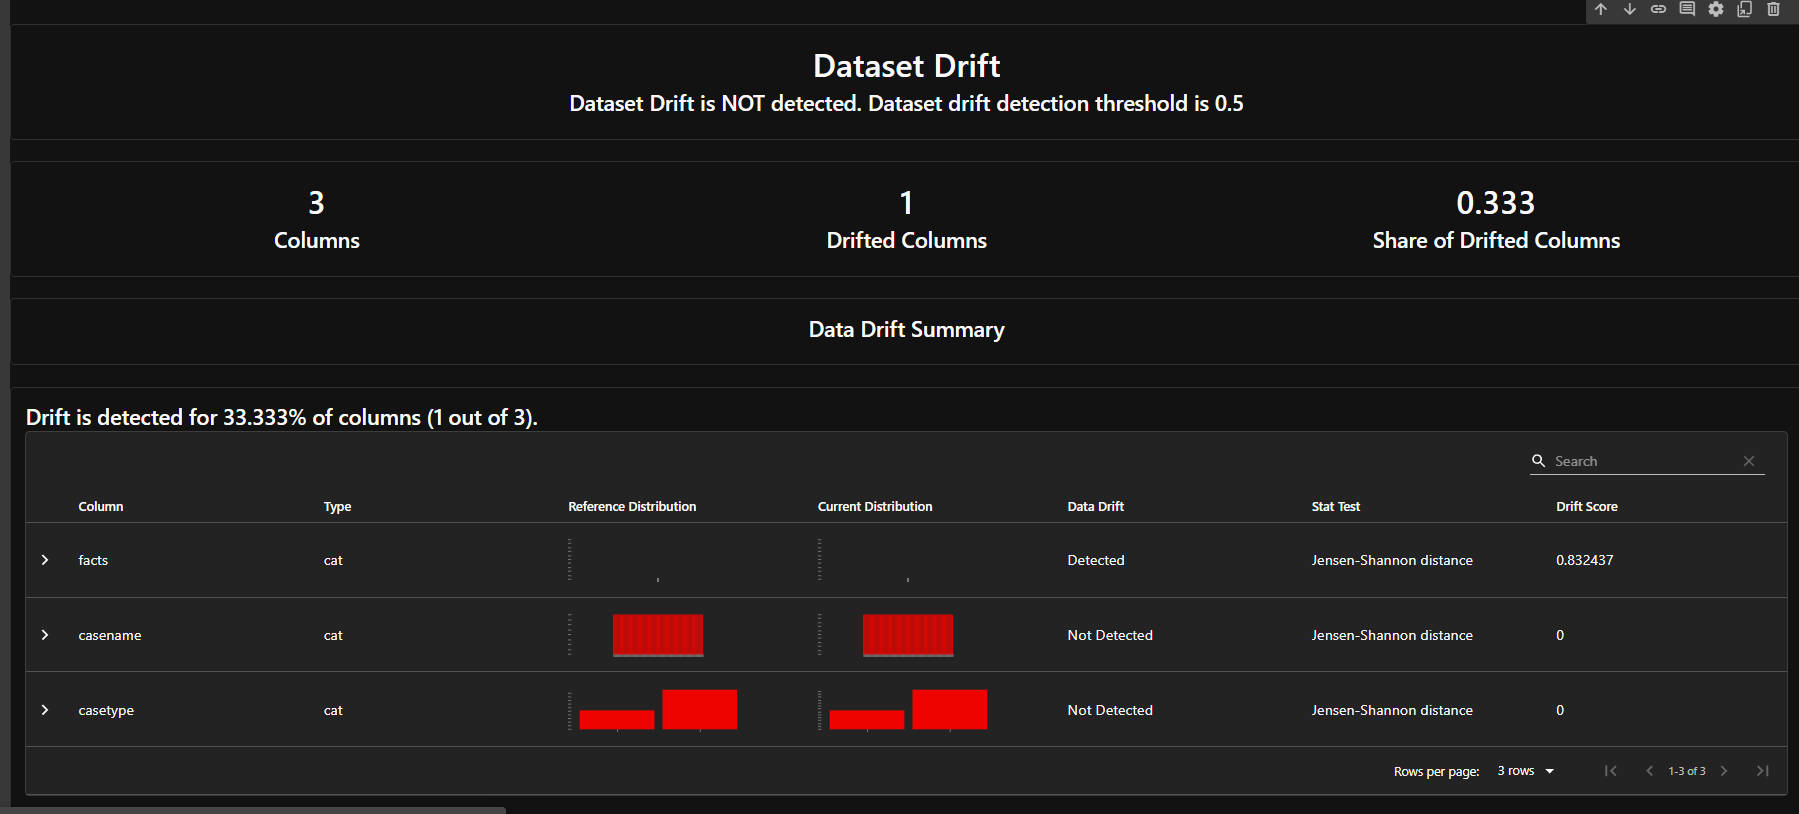

Evidently 데이터 드리프트 감지 알고리즘은 모델 예측 또는 타깃 변수뿐만 아니라 개별 피처에서 데이터 분포의 변화를 감지하는 기본 알고리즘을 사용
- 두 데이터셋의 특정 컬럼에 대한 분포를 비교해 유의미하게 변화했는지 판단해 드리프트 감지 유무 반환

In [ ]:
report = Report(metrics=[
    DataDriftPreset(), # datadrift
   # TargetDriftPreset()
])

report.run(reference_data=train, # 기준 데이터셋
           current_data=valid # 현재 데이터셋
           )
# 각 열의 유형과 관측 수, 고유 값의 수를 고려해 적합한 drift test를 자동 선택
report.show(mode='inline')

Buffered data was truncated after reaching the output size limit.

# 5. NannyML
KoBERT



In [21]:
!pip install nannyml
!pip install transformers torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.0/23.0 MB 55.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.3/59.3 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.5/260.5 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.6/179.6 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 66.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 70.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 72.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.0/38.0 MB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.8/865.8 kB 44.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.4/

In [5]:
train = pd.read_csv('train.csv')
valid = pd.read_csv('valid.csv')

https://huggingface.co/monologg/kobert/discussions/1

In [2]:
import torch
from transformers import AutoModel, AutoTokenizer

model = AutoModel.from_pretrained("monologg/kobert")
tokenizer = AutoTokenizer.from_pretrained("monologg/kobert", trust_remote_code=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [6]:
# 텍스트 데이터를 임베딩으로 변환하는 함수
def embed_text(texts):
    inputs = tokenizer(texts, return_tensors='pt', padding=True, truncation=True)
    with torch.no_grad():
        embeddings = model(**inputs).last_hidden_state[:, 0, :]  # CLS 토큰 사용
    return embeddings.numpy()

# 텍스트 임베딩을 배치로 나누어 생성하는 함수
def embed_text_in_batches(texts, batch_size=32):
    embeddings = []
    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i + batch_size]
        batch_embeddings = embed_text(batch_texts)  # 이전에 정의한 embed_text 함수를 사용
        embeddings.append(batch_embeddings)
    return np.vstack(embeddings)  # 배치 결과들을 결합

In [ ]:
# 배치 임베딩 생성
reference_embeddings = embed_text_in_batches(list(train.facts), batch_size=32)
current_embeddings = embed_text_in_batches(list(valid.facts), batch_size=32)

In [ ]:
# 임베딩 데이터를 데이터프레임으로 변환
reference_df = pd.DataFrame(reference_embeddings,
                            columns=[f'feature_{i}' for i in range(reference_embeddings.shape[1])])
current_df = pd.DataFrame(current_embeddings,
                          columns=[f'feature_{i}' for i in range(current_embeddings.shape[1])])

In [ ]:
from nannyml.drift import UnivariateDriftCalculator
from nannyml.drift import UnivariateStatisticalDriftCalculator

calc = UnivariateStatisticalDriftCalculator()
calc.fit(reference_df)
results = calc.calculate(current_df)

# 6. Alibi Detect